In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu',
                          input_shape=(X_train.shape[1],)), # Input layer

    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer

    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])

Epoch 1/100
7/7 [==============================] - 1s 5ms/step - loss: 11.6047 - mae: 3.1222
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 9.4228 - mae: 2.7534
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 7.5685 - mae: 2.4018
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 5.9409 - mae: 2.0454
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 4.5311 - mae: 1.7032
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 3.2991 - mae: 1.3779
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 2.4607 - mae: 1.1342
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 1.8921 - mae: 0.9853
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 1.5596 - mae: 0.9231
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 1.4284 - mae: 0.9064
Epoch 11/100
7/7 [==============================] - 0s 7ms/step - loss: 1.3418

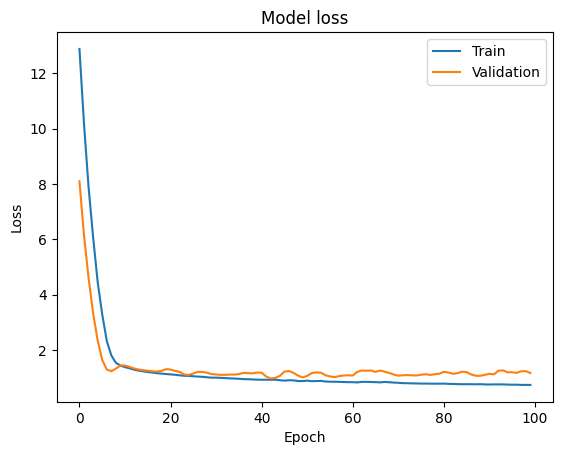

In [ ]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Early Stopping of Epochs


Epoch 1/100
7/7 [==============================] - 2s 110ms/step - loss: 9.7569 - val_loss: 5.2547
Epoch 2/100
7/7 [==============================] - 0s 18ms/step - loss: 7.4617 - val_loss: 3.6383
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 5.6110 - val_loss: 2.4394
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 4.1847 - val_loss: 1.6266
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 3.0199 - val_loss: 1.1751
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 2.2703 - val_loss: 1.0084
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 1.7533 - val_loss: 0.9993
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 1.4775 - val_loss: 1.0348
Epoch 9/100
7/7 [==============================] - 0s 13ms/step - loss: 1.3805 - val_loss: 1.0647
Epoch 10/100
7/7 [==============================] - 0s 11ms/step - loss: 1.2756 - val_loss: 0.9903
Epoch 11/100
7/7 [

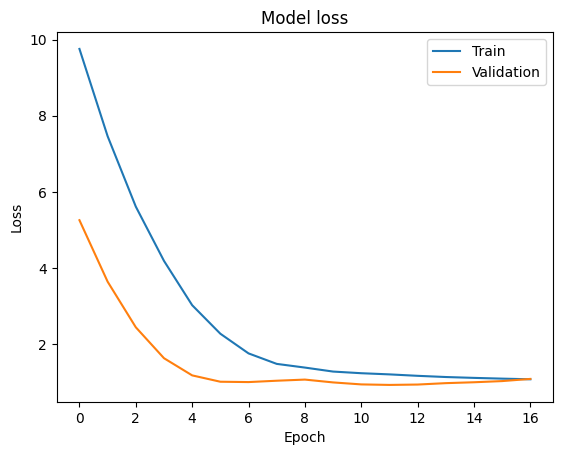

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
